<a href="https://colab.research.google.com/github/zheyun-shou/BigDataCourseProject/blob/main/Analysis_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 概要

一、赛题背景

预测性维护是工业互联网应用“皇冠上的明珠”，实现预测性维护的关键是对设备系统或核心部件的寿命进行有效预测。对工程机械设备的核心耗损性部件的剩余寿命进行预测，可以据此对于相关部件的进行提前维护或者更换，从而减少整个设备非计划停机时间，避免因计划外停机而带来的经济损失，比如导致整个生产现场其他配套设备等待故障设备部件的修复。

二、赛事任务

本赛题由中科云谷科技有限公司提供某类工程机械设备的核心耗损性部件的工作数据，包括部件工作时长、转速、温度、电压、电流等多类工况数据。希望参赛者利用大数据分析、机器学习、深度学习等方法，提取合适的特征、建立合适的寿命预测模型，预测核心耗损性部件的剩余寿命。

三、开放数据

针对某类工程机械设备的核心耗损性部件，数据集包含训练集和测试集两个部分。

训练集中，每个文件对应一个该类部件的全寿命物联网采样数据，即从安装后一直到更换之间的对应数据，形式为多维时间序列。字段“部件工作时长”的最大值（通常为最后一行记录）即为该部件实例的实际寿命。（参见样例数据）

测试集中，每个文件对应一个该类部件一段时间内的物联网采样数据，需要基于该段数据，预测该部件此后的剩余寿命。

特征数据字段包括：部件工作时长, 累积量参数1，累积量参数2，转速信号1, 转速信号2, 压力信号1, 压力信号2, 温度信号, 流量信号, 电流信号, 开关1信号, 开关2信号, 告警信号1, 设备类型。其中：

数值型字段包括：部件工作时长, 累积量参数1，累积量参数2，转速信号1, 转速信号2, 压力信号1, 压力信号2, 温度信号, 流量信号, 电流信号。

开关量字段（0或1）：开关1信号, 开关2信号, 告警信号1

字符串型字段：设备类型。

除了开关量以外，上述设备类型、工况数据的具体值都经过了一定的脱敏处理，但已考虑尽量不影响数据蕴含的关系。

赛题的算法预测精度的衡量标准公式如下：

![工程机械寿命预测公式](工程机械寿命预测公式.png)

其中，ri表示第i个样本的真实剩余寿命，r ̂_i表示第i个样本的预测剩余寿命。

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 数据探索

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
sns.set_style({'font.sans-serif':['Microsoft YaHei','Arial']})



## 数据初探

In [ ]:
first_train_research = pd.read_csv('/content/drive/MyDrive/big_data/train/00fb58ecd675062e4423.csv')

In [ ]:
first_train_research.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55859 entries, 0 to 55858
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   部件工作时长  55859 non-null  float64
 1   累积量参数1  55859 non-null  float64
 2   累积量参数2  55859 non-null  float64
 3   转速信号1   55859 non-null  float64
 4   转速信号2   55859 non-null  float64
 5   压力信号1   55859 non-null  float64
 6   压力信号2   55859 non-null  float64
 7   温度信号    55859 non-null  float64
 8   流量信号    55859 non-null  float64
 9   电流信号    55859 non-null  float64
 10  开关1信号   55859 non-null  float64
 11  开关2信号   55859 non-null  float64
 12  告警信号1   55859 non-null  float64
 13  设备类型    55859 non-null  object 
dtypes: float64(13), object(1)
memory usage: 6.0+ MB


In [ ]:
pd.isnull(first_train_research).sum()

部件工作时长    0
累积量参数1    0
累积量参数2    0
转速信号1     0
转速信号2     0
压力信号1     0
压力信号2     0
温度信号      0
流量信号      0
电流信号      0
开关1信号     0
开关2信号     0
告警信号1     0
设备类型      0
dtype: int64

In [ ]:
first_train_research.head()

,部件工作时长,累积量参数1,累积量参数2,转速信号1,转速信号2,压力信号1,压力信号2,温度信号,流量信号,电流信号,开关1信号,开关2信号,告警信号1,设备类型
0,0.0,0.0,0.0,10801.19,24614.69,67.86,372.86,42.2,132.66,1627.52,0.0,0.0,0.0,S26a
1,0.0,0.0,0.0,7666.51,17452.22,76.95,374.27,42.2,135.06,1627.52,0.0,0.0,0.0,S26a
2,0.0,0.0,0.0,7661.61,17451.80,85.17,373.47,42.2,134.68,1627.65,0.0,0.0,0.0,S26a
3,0.0,0.0,0.0,7656.61,17452.76,86.35,373.86,42.2,134.69,1627.69,0.0,0.0,0.0,S26a
4,0.0,0.0,0.0,7657.57,17448.74,86.39,374.54,42.2,132.80,1627.63,0.0,0.0,0.0,S26a


In [ ]:
first_train_research.describe()

,部件工作时长,累积量参数1,累积量参数2,转速信号1,转速信号2,压力信号1,压力信号2,温度信号,流量信号,电流信号,开关1信号,开关2信号,告警信号1
count,55859.000000,55859.000000,55859.000000,55859.000000,55859.000000,55859.000000,55859.000000,55859.000000,55859.000000,55859.000000,55859.000000,55859.0,55859.000000
mean,4066.770592,76622.149242,81165.021975,7828.778586,17146.625721,118.529115,341.903339,60.995861,83.571954,829.339170,0.315527,0.0,0.029843
std,2227.611652,43287.889501,45491.092616,2924.623679,7760.556261,103.325901,61.408848,11.628993,43.019423,411.934032,0.464729,0.0,0.170156
min,0.000000,0.000000,0.000000,0.000000,0.010000,0.010000,0.000000,5.600000,0.000000,0.000000,0.000000,0.0,0.000000
25%,2181.250000,39674.250000,42402.750000,5202.400000,11845.520000,67.410000,334.920000,55.600000,49.030000,620.100000,0.000000,0.0,0.000000
50%,4185.500000,77357.500000,82797.000000,5322.170000,12005.350000,68.970000,354.340000,62.100000,73.550000,620.210000,0.000000,0.0,0.000000
75%,5880.250000,112950.750000,119518.750000,10728.185000,24432.870000,173.175000,371.640000,67.900000,132.350000,1178.270000,1.000000,0.0,0.000000
max,7942.500000,152438.000000,159607.500000,12985.950000,28973.530000,950.440000,472.030000,115.600000,138.500000,1627.800000,1.000000,0.0,1.000000


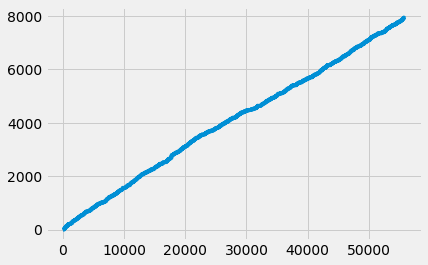

In [ ]:
first_train_research['部件工作时长'].plot()

In [ ]:
#df_train_label['life'][df_train_label['train_file_name']=='00fb58ecd675062e4423.csv']

## 数据合并

### 训练集标签（y：target）

In [ ]:
df_train_label = pd.read_csv('/content/drive/MyDrive/big_data/df_train_label.csv')
df_train_label

,train_file_name,life
0,9fd98bbe3b382afd3f5a.csv,3316.50
1,b8e6aade4c840973a6d1.csv,6146.75
2,3637658769eba73e3672.csv,8502.50
3,cac3c473d4a6071ee522.csv,4748.75
4,8b50779f8fed99a1bb3e.csv,2547.75
...,...,...
911,581c949015af35485f7f.csv,6121.00
912,883a52557886091ea147.csv,4013.75
913,dd64c4c88279afb8d6e0.csv,272.75
914,48350eac19ee5de0ab13.csv,777.50


In [ ]:
columns = ['部件工作时长', 
           '累积量参数1', '累积量参数2', 
           '转速信号1低转速段均值', '转速信号1高转速段均值','转速信号1低转速段标准差', '转速信号1高转速段标准差',
           '转速信号2低转速段均值', '转速信号2高转速段均值','转速信号2低转速段标准差', '转速信号2高转速段标准差', 
           '压力信号1低压力段标准差', '压力信号1高压力段标准差', '压力信号2低压力段标准差', '压力信号2高压力段标准差', 
           '温度信号均值', '温度信号标准差', '流量信号均值', '流量信号标准差', 
           '流量信号低流量段均值','流量信号中流量段均值','流量信号高流量段均值','流量信号低流量段标准差','流量信号中流量段标准差','流量信号高流量段标准差',
           '电流信号低电流段均值','电流信号中电流段均值','电流信号高电流段均值','电流信号低电流段标准差','电流信号中电流段标准差','电流信号高电流段标准差',
           '开关1信号', '开关2信号', '告警信号1', '设备类型']
parts_mean_df = pd.DataFrame(columns=columns)
parts_mean_df

,部件工作时长,累积量参数1,累积量参数2,转速信号1低转速段均值,转速信号1高转速段均值,转速信号1低转速段标准差,转速信号1高转速段标准差,转速信号2低转速段均值,转速信号2高转速段均值,转速信号2低转速段标准差,...,电流信号低电流段均值,电流信号中电流段均值,电流信号高电流段均值,电流信号低电流段标准差,电流信号中电流段标准差,电流信号高电流段标准差,开关1信号,开关2信号,告警信号1,设备类型


In [ ]:
for i in range(df_train_label.shape[0]):
    connet_df = pd.read_csv('/content/drive/MyDrive/big_data/train/' + df_train_label['train_file_name'][i])
    #数据升维
    #电流信号e
    length_e = len(connet_df['电流信号'])
    low_current_e = list(num for num in connet_df['电流信号'] if 0 <= num < 20)
    mid_current_e = list(num for num in connet_df['电流信号'] if 500 <= num < 750)
    high_current_e = list(num for num in connet_df['电流信号'] if 800 <= num < 1800)
    low_percentage_e = np.sum(low_current_e) / length_e
    mid_percentage_e = np.sum(mid_current_e) / length_e
    high_percentage_e = np.sum(high_current_e) / length_e
    #流量信号f
    length_f = len(connet_df['流量信号'])
    low_current_f = list(num for num in connet_df['流量信号'] if 0 <= num < 9)
    mid_current_f = list(num for num in connet_df['流量信号'] if 10 <= num < 120)
    high_current_f = list(num for num in connet_df['流量信号'] if 125 <= num < 145)
    low_percentage_f = np.sum(low_current_f) / length_f
    mid_percentage_f = np.sum(mid_current_f) / length_f
    high_percentage_f = np.sum(high_current_f) / length_f
    #压力信号1_p1
    length_p1=len(connet_df['压力信号1'])
    low_pressure_p1 = list(num for num in connet_df['压力信号1'] if 65 <= num <=75)
    high_pressure_p1 = list(num for num in connet_df['压力信号1'] if 180 <= num <= 400)
    low_percentage_p1 = np.sum(low_pressure_p1) / length_p1
    high_percentage_p1 = np.sum(high_pressure_p1) / length_p1
    #压力信号2_p2
    length_p2=len(connet_df['压力信号2'])
    low_pressure_p2 = list(num for num in connet_df['压力信号2'] if 0 <= num <=50)
    high_pressure_p2 = list(num for num in connet_df['压力信号2'] if 200 <= num)
    low_percentage_p2 = np.sum(low_pressure_p2) / length_p2
    high_percentage_p2 = np.sum(high_pressure_p2) / length_p2
    #转速信号1_r1
    length_r1 = len(connet_df['转速信号1'])
    low_pressure_r1 = list(num for num in connet_df['转速信号1'] if 0 <= num <=100)
    high_pressure_r1 = list(num for num in connet_df['转速信号1'] if 3000 <= num)
    low_percentage_r1 = np.sum(low_pressure_r1) / length_r1
    high_percentage_r1 = np.sum(high_pressure_r1) / length_r1
    #转速信号2_r2
    length_r2 = len(connet_df['转速信号2'])
    low_pressure_r2 = list(num for num in connet_df['转速信号2'] if 0 <= num <=1000)
    high_pressure_r2 = list(num for num in connet_df['转速信号2'] if 10000 <= num) 
    low_percentage_r2 = np.sum(low_pressure_r2) / length_r2
    high_percentage_r2 = np.sum(high_pressure_r2) / length_r2

    parts_mean_df = parts_mean_df.append(pd.DataFrame({'部件工作时长':[connet_df['部件工作时长'].max()],
                                                   '累积量参数1':[connet_df['累积量参数1'].max()],
                                                   '累积量参数2':[connet_df['累积量参数2'].max()],
                                                   '转速信号1低转速段均值':np.mean(low_pressure_r1) * low_percentage_r1,
                                                   '转速信号1高转速段均值':np.mean(high_pressure_r1) * high_percentage_r1,
                                                   '转速信号1低转速段标准差':np.std(low_pressure_r1) * low_percentage_r1,
                                                   '转速信号1高转速段标准差':np.std(high_pressure_r1) * high_percentage_r1,
                                                   '转速信号2低转速段均值':np.mean(low_pressure_r2) * low_percentage_r2,
                                                   '转速信号2高转速段均值':np.mean(high_pressure_r2) * high_percentage_r2,
                                                   '转速信号2低转速段标准差':np.std(low_pressure_r2) * low_percentage_r2,
                                                   '转速信号2高转速段标准差':np.std(high_pressure_r2) * high_percentage_r2,
                                                   '压力信号1低压力段标准差':[np.std(low_pressure_p1) * low_percentage_p1],
                                                   '压力信号1高压力段标准差':[np.std(low_pressure_p1) * low_percentage_p1],
                                                   '压力信号2低压力段标准差':[np.std(low_pressure_p2) * low_percentage_p2],
                                                   '压力信号2高压力段标准差':[np.std(low_pressure_p2) * low_percentage_p2],
                                                   '温度信号均值':[connet_df['温度信号'].mean()],
                                                   '温度信号标准差':[connet_df['温度信号'].std()],
                                                   '流量信号均值':[connet_df['流量信号'].mean()],
                                                   '流量信号标准差':[connet_df['流量信号'].std()],
                                                   '流量信号低流量段均值':np.mean(low_current_f) * low_percentage_f,
                                                   '流量信号中流量段均值':np.mean(low_current_f) * low_percentage_f,
                                                   '流量信号高流量段均值':np.mean(low_current_f) * low_percentage_f,
                                                   '流量信号低流量段标准差':np.mean(low_current_f) * low_percentage_f,
                                                   '流量信号中流量段标准差':np.mean(low_current_f) * low_percentage_f,
                                                   '流量信号高流量段标准差':np.mean(low_current_f) * low_percentage_f,
                                                   '电流信号低电流段均值':np.mean(low_current_e) * low_percentage_e,
                                                   '电流信号中电流段均值':np.mean(mid_current_e) * mid_percentage_e,
                                                   '电流信号高电流段均值':np.mean(high_current_e) * high_percentage_e,
                                                   '电流信号低电流段标准差':np.std(low_current_e) * low_percentage_e,
                                                   '电流信号中电流段标准差':np.std(mid_current_e) * mid_percentage_e,
                                                   '电流信号高电流段标准差':np.std(high_current_e) * high_percentage_e,
                                                   '开关1信号':[connet_df['开关1信号'][connet_df['开关1信号']>0].sum()],
                                                   '开关2信号':[connet_df['开关2信号'][connet_df['开关2信号']>0].sum()],
                                                   '告警信号1':[connet_df['告警信号1'][connet_df['告警信号1']>0].sum()],
                                                   '设备类型':[connet_df['设备类型'][0]]}),
                                     ignore_index=True)



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
parts_mean_df.head()

,部件工作时长,累积量参数1,累积量参数2,转速信号1低转速段均值,转速信号1高转速段均值,转速信号1低转速段标准差,转速信号1高转速段标准差,转速信号2低转速段均值,转速信号2高转速段均值,转速信号2低转速段标准差,...,电流信号低电流段均值,电流信号中电流段均值,电流信号高电流段均值,电流信号低电流段标准差,电流信号中电流段标准差,电流信号高电流段标准差,开关1信号,开关2信号,告警信号1,设备类型
0,3326.00,59185.5,56400.5,0.000575,5.865716e+07,0.000738,2.139234e+07,122.310649,3.000604e+08,191.449691,...,0.001186,237175.311838,5.117891e+05,0.000665,1764.775400,60055.243966,6797.0,0.0,362.0,S26a
1,6166.25,97185.0,99677.5,0.042393,5.544790e+07,0.025766,1.854247e+07,8.488713,NaN,4.894897,...,0.002743,259.444081,1.334025e+06,0.001573,30.405761,190956.852635,11947.0,0.0,1156.0,S51d
2,8502.50,164521.5,143383.5,0.080166,5.312286e+07,0.051841,1.860640e+07,2173.251711,2.680566e+08,2674.266921,...,0.003418,224147.877410,3.592416e+05,0.001959,1610.146868,51082.910575,15888.0,0.0,2610.0,S51d
3,4748.75,98059.5,92761.5,0.059543,5.747958e+07,0.055675,2.153462e+07,796.848940,2.895916e+08,1121.068743,...,0.000752,263628.810983,4.314657e+05,0.000427,1418.995052,68630.353160,10048.0,0.0,1126.0,S26a
4,2565.00,36822.5,40345.5,0.019760,5.918550e+07,0.012809,2.181445e+07,1173.750153,3.029923e+08,920.623654,...,0.000653,241129.097079,5.805090e+05,0.000398,33.565831,70302.082327,5112.0,0.0,82.0,S26a


In [ ]:
pd.isnull(parts_mean_df).sum()

部件工作时长            0
累积量参数1            0
累积量参数2            0
转速信号1低转速段均值      53
转速信号1高转速段均值       0
转速信号1低转速段标准差     53
转速信号1高转速段标准差      0
转速信号2低转速段均值       3
转速信号2高转速段均值      94
转速信号2低转速段标准差      3
转速信号2高转速段标准差     94
压力信号1低压力段标准差      3
压力信号1高压力段标准差      3
压力信号2低压力段标准差     15
压力信号2高压力段标准差     15
温度信号均值            0
温度信号标准差           0
流量信号均值            0
流量信号标准差           0
流量信号低流量段均值        3
流量信号中流量段均值        3
流量信号高流量段均值        3
流量信号低流量段标准差       3
流量信号中流量段标准差       3
流量信号高流量段标准差       3
电流信号低电流段均值        4
电流信号中电流段均值      132
电流信号高电流段均值        0
电流信号低电流段标准差       4
电流信号中电流段标准差     132
电流信号高电流段标准差       0
开关1信号             0
开关2信号             0
告警信号1             0
设备类型              0
dtype: int64

In [ ]:
#缺失值处理
for item in ['累积量参数1', '累积量参数2', 
           '转速信号1低转速段均值', '转速信号1高转速段均值','转速信号1低转速段标准差', '转速信号1高转速段标准差',
           '转速信号2低转速段均值', '转速信号2高转速段均值','转速信号2低转速段标准差', '转速信号2高转速段标准差', 
           '压力信号1低压力段标准差', '压力信号1高压力段标准差', '压力信号2低压力段标准差', '压力信号2高压力段标准差', 
           '温度信号均值', '温度信号标准差', '流量信号均值', '流量信号标准差', 
           '流量信号低流量段均值','流量信号中流量段均值','流量信号高流量段均值','流量信号低流量段标准差','流量信号中流量段标准差','流量信号高流量段标准差',
           '电流信号低电流段均值','电流信号中电流段均值','电流信号高电流段均值','电流信号低电流段标准差','电流信号中电流段标准差','电流信号高电流段标准差']:
  parts_mean_df[item]=parts_mean_df[item].fillna(parts_mean_df[item].mean())

In [ ]:
parts_mean_df.head()

,部件工作时长,累积量参数1,累积量参数2,转速信号1低转速段均值,转速信号1高转速段均值,转速信号1低转速段标准差,转速信号1高转速段标准差,转速信号2低转速段均值,转速信号2高转速段均值,转速信号2低转速段标准差,...,电流信号低电流段均值,电流信号中电流段均值,电流信号高电流段均值,电流信号低电流段标准差,电流信号中电流段标准差,电流信号高电流段标准差,开关1信号,开关2信号,告警信号1,设备类型
0,3326.00,59185.5,56400.5,0.000575,5.865716e+07,0.000738,2.139234e+07,122.310649,3.000604e+08,191.449691,...,0.001186,237175.311838,5.117891e+05,0.000665,1764.775400,60055.243966,6797.0,0.0,362.0,S26a
1,6166.25,97185.0,99677.5,0.042393,5.544790e+07,0.025766,1.854247e+07,8.488713,2.809272e+08,4.894897,...,0.002743,259.444081,1.334025e+06,0.001573,30.405761,190956.852635,11947.0,0.0,1156.0,S51d
2,8502.50,164521.5,143383.5,0.080166,5.312286e+07,0.051841,1.860640e+07,2173.251711,2.680566e+08,2674.266921,...,0.003418,224147.877410,3.592416e+05,0.001959,1610.146868,51082.910575,15888.0,0.0,2610.0,S51d
3,4748.75,98059.5,92761.5,0.059543,5.747958e+07,0.055675,2.153462e+07,796.848940,2.895916e+08,1121.068743,...,0.000752,263628.810983,4.314657e+05,0.000427,1418.995052,68630.353160,10048.0,0.0,1126.0,S26a
4,2565.00,36822.5,40345.5,0.019760,5.918550e+07,0.012809,2.181445e+07,1173.750153,3.029923e+08,920.623654,...,0.000653,241129.097079,5.805090e+05,0.000398,33.565831,70302.082327,5112.0,0.0,82.0,S26a


In [ ]:
parts_mean_df.describe()

,部件工作时长,累积量参数1,累积量参数2,转速信号1低转速段均值,转速信号1高转速段均值,转速信号1低转速段标准差,转速信号1高转速段标准差,转速信号2低转速段均值,转速信号2高转速段均值,转速信号2低转速段标准差,...,流量信号高流量段标准差,电流信号低电流段均值,电流信号中电流段均值,电流信号高电流段均值,电流信号低电流段标准差,电流信号中电流段标准差,电流信号高电流段标准差,开关1信号,开关2信号,告警信号1
count,9.160000e+02,916.000000,916.000000,916.000000,9.160000e+02,916.000000,9.160000e+02,916.000000,9.160000e+02,916.000000,...,916.000000,916.000000,916.000000,9.160000e+02,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000
mean,5.481014e+03,66389.461245,64536.115721,0.121068,6.017998e+07,0.107477,2.230076e+07,2553.688780,2.809272e+08,2374.780507,...,1.292902,0.001937,148928.500099,9.056792e+05,0.001615,1195.020061,134232.198946,10969.504367,4.558952,1071.360262
std,5.413164e+04,62436.797981,61811.689653,0.265522,2.156648e+07,0.340299,6.433227e+07,3597.351116,6.972064e+07,2785.356888,...,0.846237,0.001418,95908.418404,5.135746e+05,0.003292,1884.588490,87838.063079,28862.381815,106.427008,6860.787859
min,2.500000e+02,77.000000,0.000000,0.000030,4.034994e+07,0.000000,1.114156e+07,0.017318,1.976300e+05,0.018196,...,0.019258,0.000040,11.631073,5.723507e+03,0.000023,0.000000,322.831589,0.000000,0.000000,0.000000
25%,9.546250e+02,17767.750000,16448.250000,0.020307,5.461990e+07,0.012162,1.852857e+07,238.634547,2.664971e+08,392.897739,...,0.661716,0.000876,35340.066083,4.926842e+05,0.000510,30.182958,66684.150036,2103.250000,0.000000,77.000000
50%,2.643500e+03,47657.500000,45061.250000,0.055146,5.814127e+07,0.032179,2.000916e+07,1179.181322,2.816452e+08,1315.605336,...,1.065990,0.001522,182260.567658,6.633554e+05,0.000899,1035.371998,92182.309184,5759.000000,0.000000,257.500000
75%,5.490500e+03,95746.750000,95504.500000,0.121068,6.218505e+07,0.092865,2.171442e+07,3243.748381,3.078180e+08,3392.741242,...,1.762874,0.002745,229186.561089,1.429446e+06,0.001725,1496.454644,211488.700415,11939.500000,0.000000,760.250000
max,1.638378e+06,415470.000000,416052.000000,3.552310,6.558725e+08,5.117790,1.965814e+09,24907.541488,7.081377e+08,18131.101551,...,4.793019,0.009609,297612.351837,2.445581e+06,0.046259,16130.575866,443237.790431,425112.000000,3000.000000,161097.000000


In [ ]:
parts_mean_df['开关2信号'][parts_mean_df['开关2信号']>0].sum()

4176.0

In [ ]:
# 开关2信号特征差异太大，予以删除
parts_train_feature_df = parts_mean_df.drop('开关2信号', axis=1)

In [ ]:
parts_train_feature_df.describe()

,部件工作时长,累积量参数1,累积量参数2,转速信号1低转速段均值,转速信号1高转速段均值,转速信号1低转速段标准差,转速信号1高转速段标准差,转速信号2低转速段均值,转速信号2高转速段均值,转速信号2低转速段标准差,...,流量信号中流量段标准差,流量信号高流量段标准差,电流信号低电流段均值,电流信号中电流段均值,电流信号高电流段均值,电流信号低电流段标准差,电流信号中电流段标准差,电流信号高电流段标准差,开关1信号,告警信号1
count,9.160000e+02,916.000000,916.000000,916.000000,9.160000e+02,916.000000,9.160000e+02,916.000000,9.160000e+02,916.000000,...,916.000000,916.000000,916.000000,916.000000,9.160000e+02,916.000000,916.000000,916.000000,916.000000,916.000000
mean,5.481014e+03,66389.461245,64536.115721,0.121068,6.017998e+07,0.107477,2.230076e+07,2553.688780,2.809272e+08,2374.780507,...,1.292902,1.292902,0.001937,148928.500099,9.056792e+05,0.001615,1195.020061,134232.198946,10969.504367,1071.360262
std,5.413164e+04,62436.797981,61811.689653,0.265522,2.156648e+07,0.340299,6.433227e+07,3597.351116,6.972064e+07,2785.356888,...,0.846237,0.846237,0.001418,95908.418404,5.135746e+05,0.003292,1884.588490,87838.063079,28862.381815,6860.787859
min,2.500000e+02,77.000000,0.000000,0.000030,4.034994e+07,0.000000,1.114156e+07,0.017318,1.976300e+05,0.018196,...,0.019258,0.019258,0.000040,11.631073,5.723507e+03,0.000023,0.000000,322.831589,0.000000,0.000000
25%,9.546250e+02,17767.750000,16448.250000,0.020307,5.461990e+07,0.012162,1.852857e+07,238.634547,2.664971e+08,392.897739,...,0.661716,0.661716,0.000876,35340.066083,4.926842e+05,0.000510,30.182958,66684.150036,2103.250000,77.000000
50%,2.643500e+03,47657.500000,45061.250000,0.055146,5.814127e+07,0.032179,2.000916e+07,1179.181322,2.816452e+08,1315.605336,...,1.065990,1.065990,0.001522,182260.567658,6.633554e+05,0.000899,1035.371998,92182.309184,5759.000000,257.500000
75%,5.490500e+03,95746.750000,95504.500000,0.121068,6.218505e+07,0.092865,2.171442e+07,3243.748381,3.078180e+08,3392.741242,...,1.762874,1.762874,0.002745,229186.561089,1.429446e+06,0.001725,1496.454644,211488.700415,11939.500000,760.250000
max,1.638378e+06,415470.000000,416052.000000,3.552310,6.558725e+08,5.117790,1.965814e+09,24907.541488,7.081377e+08,18131.101551,...,4.793019,4.793019,0.009609,297612.351837,2.445581e+06,0.046259,16130.575866,443237.790431,425112.000000,161097.000000


## 数据可视化分析

### 合并X与y分析

In [ ]:
parts_train_feature_df['life'] = df_train_label['life']

In [ ]:
parts_train_feature_df.describe()

,部件工作时长,累积量参数1,累积量参数2,转速信号1低转速段均值,转速信号1高转速段均值,转速信号1低转速段标准差,转速信号1高转速段标准差,转速信号2低转速段均值,转速信号2高转速段均值,转速信号2低转速段标准差,...,流量信号高流量段标准差,电流信号低电流段均值,电流信号中电流段均值,电流信号高电流段均值,电流信号低电流段标准差,电流信号中电流段标准差,电流信号高电流段标准差,开关1信号,告警信号1,life
count,9.160000e+02,916.000000,916.000000,916.000000,9.160000e+02,916.000000,9.160000e+02,916.000000,9.160000e+02,916.000000,...,916.000000,916.000000,916.000000,9.160000e+02,916.000000,916.000000,916.000000,916.000000,916.000000,9.160000e+02
mean,5.481014e+03,66389.461245,64536.115721,0.121068,6.017998e+07,0.107477,2.230076e+07,2553.688780,2.809272e+08,2374.780507,...,1.292902,0.001937,148928.500099,9.056792e+05,0.001615,1195.020061,134232.198946,10969.504367,1071.360262,5.449701e+03
std,5.413164e+04,62436.797981,61811.689653,0.265522,2.156648e+07,0.340299,6.433227e+07,3597.351116,6.972064e+07,2785.356888,...,0.846237,0.001418,95908.418404,5.135746e+05,0.003292,1884.588490,87838.063079,28862.381815,6860.787859,5.413317e+04
min,2.500000e+02,77.000000,0.000000,0.000030,4.034994e+07,0.000000,1.114156e+07,0.017318,1.976300e+05,0.018196,...,0.019258,0.000040,11.631073,5.723507e+03,0.000023,0.000000,322.831589,0.000000,0.000000,-5.555250e+03
25%,9.546250e+02,17767.750000,16448.250000,0.020307,5.461990e+07,0.012162,1.852857e+07,238.634547,2.664971e+08,392.897739,...,0.661716,0.000876,35340.066083,4.926842e+05,0.000510,30.182958,66684.150036,2103.250000,77.000000,9.258750e+02
50%,2.643500e+03,47657.500000,45061.250000,0.055146,5.814127e+07,0.032179,2.000916e+07,1179.181322,2.816452e+08,1315.605336,...,1.065990,0.001522,182260.567658,6.633554e+05,0.000899,1035.371998,92182.309184,5759.000000,257.500000,2.560875e+03
75%,5.490500e+03,95746.750000,95504.500000,0.121068,6.218505e+07,0.092865,2.171442e+07,3243.748381,3.078180e+08,3392.741242,...,1.762874,0.002745,229186.561089,1.429446e+06,0.001725,1496.454644,211488.700415,11939.500000,760.250000,5.463312e+03
max,1.638378e+06,415470.000000,416052.000000,3.552310,6.558725e+08,5.117790,1.965814e+09,24907.541488,7.081377e+08,18131.101551,...,4.793019,0.009609,297612.351837,2.445581e+06,0.046259,16130.575866,443237.790431,425112.000000,161097.000000,1.638378e+06


In [ ]:
df_train_label.iloc[839]

train_file_name    5e595f98decdcfe8f2b2.csv
life                               -5555.25
Name: 839, dtype: object

In [ ]:
train839 = pd.read_csv('/content/drive/MyDrive/big_data/train/5e595f98decdcfe8f2b2.csv')

In [ ]:
train839.describe()

,部件工作时长,累积量参数1,累积量参数2,转速信号1,转速信号2,压力信号1,压力信号2,温度信号,流量信号,电流信号,开关1信号,开关2信号,告警信号1
count,26357.000000,26357.000000,26357.000000,26357.000000,26357.000000,26357.000000,26357.000000,26357.000000,26357.000000,26357.000000,26357.000000,26357.0,26357.000000
mean,-4957.068872,52552.414027,55479.807565,8162.475798,18076.690581,171.239589,347.771339,49.268016,75.942371,896.490713,0.401336,0.0,0.020222
std,3794.695078,30224.796661,31175.674010,2832.404044,6970.042354,154.635938,48.319150,10.482689,48.115262,410.016873,0.490178,0.0,0.140763
min,-9116.500000,0.000000,0.000000,0.000000,0.030000,2.260000,2.300000,5.100000,0.000000,0.000000,0.000000,0.0,0.000000
25%,-7842.500000,27137.000000,29289.000000,5251.950000,11870.770000,61.460000,359.600000,44.500000,33.060000,620.120000,0.000000,0.0,0.000000
50%,-6574.250000,53504.000000,57648.500000,9234.680000,20810.480000,63.720000,362.160000,49.600000,57.540000,620.250000,0.000000,0.0,0.000000
75%,230.250000,78380.500000,81464.500000,10091.380000,22793.480000,290.410000,365.350000,55.200000,131.910000,1261.780000,1.000000,0.0,0.000000
max,1642.250000,102663.000000,106223.000000,13964.290000,30568.520000,931.360000,379.220000,89.800000,138.500000,2015.300000,1.000000,0.0,1.000000


In [ ]:
# 第839个特征差异巨大，予以删除
parts_train_feature_df = parts_train_feature_df.drop(parts_train_feature_df.index[[839]]).reset_index(drop=True)
df_train_label = df_train_label.drop(df_train_label.index[[839]]).reset_index(drop=True)

### 不同设备部件工作时长特征分析

In [ ]:
df_device_type_count = parts_train_feature_df.groupby('设备类型')['部件工作时长'].count().sort_values(ascending=False).to_frame().reset_index()
df_device_type_mean = parts_train_feature_df.groupby('设备类型')['部件工作时长'].mean().sort_values(ascending=False).to_frame().reset_index()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 19981 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35774 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22791 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31867 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22411 missing from current font.
  font.set_

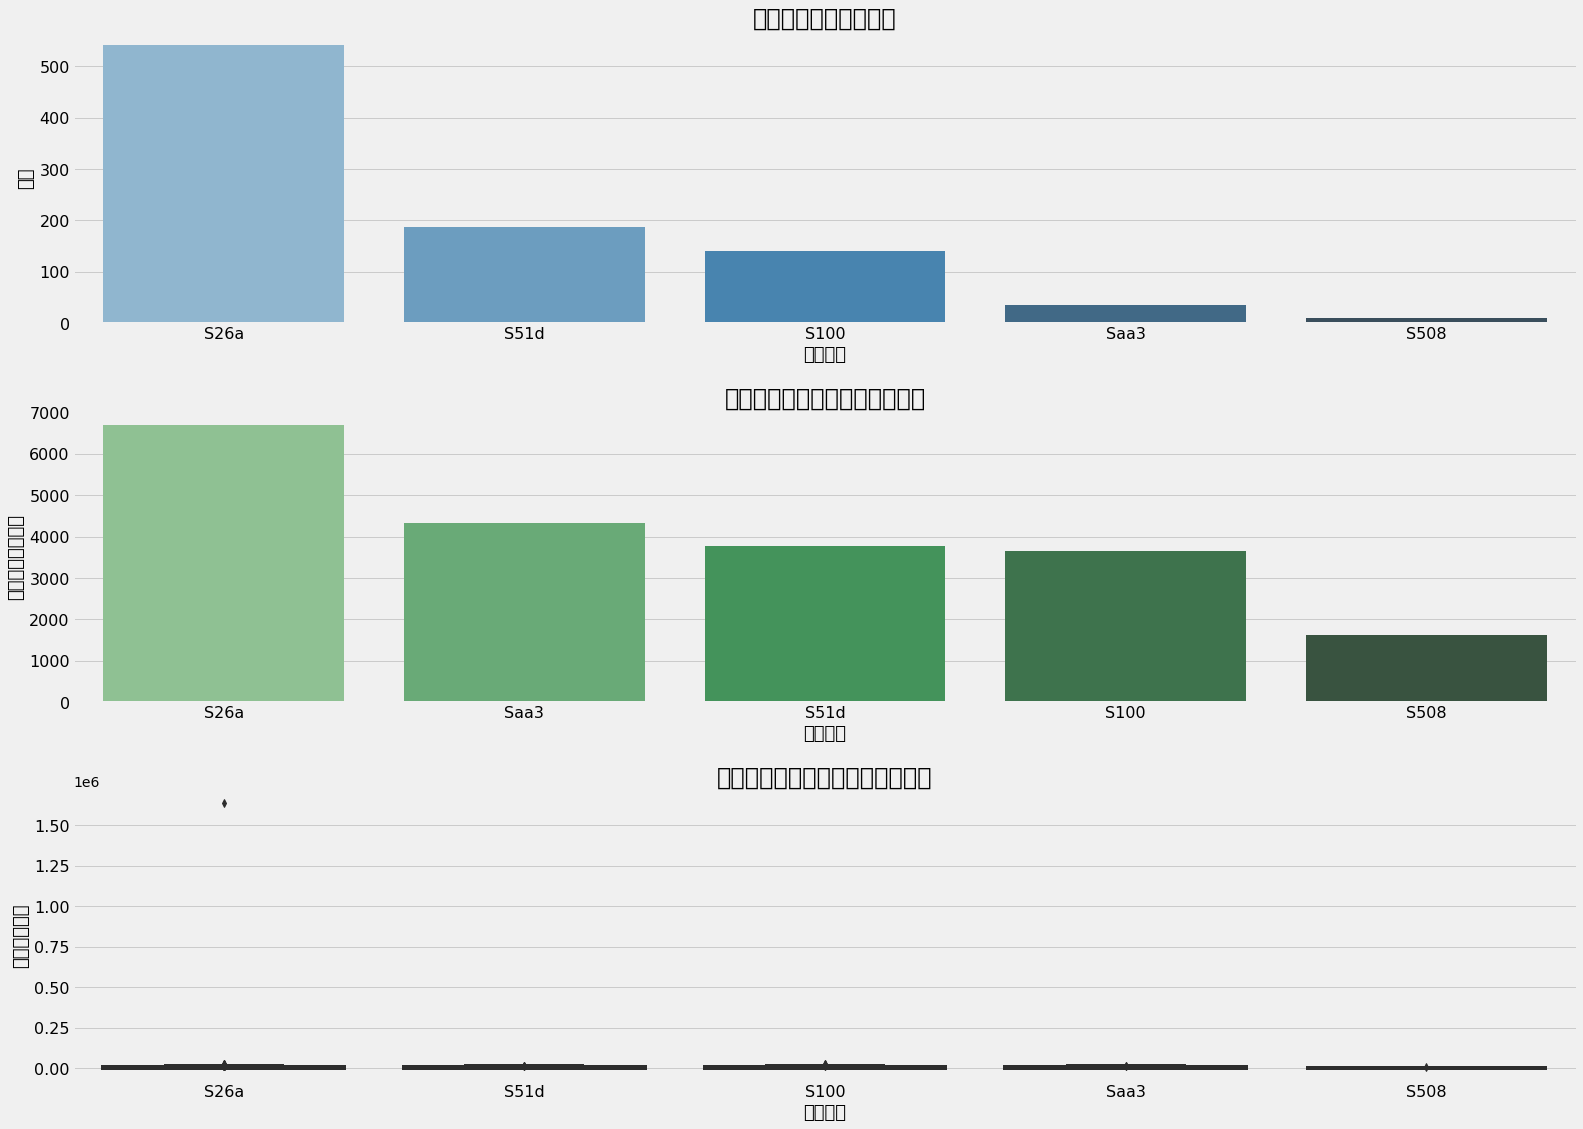

In [ ]:
f, [ax1, ax2, ax3] = plt.subplots(3, 1, figsize=(24,18))
sns.barplot(x='设备类型', y='部件工作时长', palette='Blues_d', data=df_device_type_count, ax=ax1)
ax1.set_title('不同设备类型计数分布', fontsize=24)
ax1.tick_params(axis='x',labelsize=16) 
ax1.tick_params(axis='y',labelsize=16) 
ax1.set_xlabel('设备类型', fontsize=18)
ax1.set_ylabel('数量', fontsize=18)

sns.barplot(x='设备类型', y='部件工作时长', palette='Greens_d', data=df_device_type_mean, ax=ax2)
ax2.set_title('不同设备类型部件工作平均时长', fontsize=24)
ax2.tick_params(axis='x',labelsize=16) 
ax2.tick_params(axis='y',labelsize=16) 
ax2.set_xlabel('设备类型', fontsize=18)
ax2.set_ylabel('部件工作平均时长', fontsize=18)

sns.boxplot(x='设备类型', y='部件工作时长', palette='Blues_d', data=parts_train_feature_df, ax=ax3)
ax3.set_title('不同设备类型部件工作时长箱形图', fontsize=24)
ax3.tick_params(axis='x',labelsize=16) 
ax3.tick_params(axis='y',labelsize=16) 
ax3.set_xlabel('设备类型', fontsize=18)
ax3.set_ylabel('部件工作时长', fontsize=18)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
plt.show()

In [ ]:
parts_train_feature_df['部件工作时长'][parts_train_feature_df['部件工作时长']>1.0e+04]

14       11712.50
45       10484.00
64       10557.50
65       12734.00
105      13417.50
134      12665.00
145      12605.75
146      11031.75
160      15830.75
161      14819.25
163      12516.00
167      11475.50
191      14482.50
193      12341.00
227      13739.00
235      14785.50
275      11962.50
299      12218.00
302      25108.75
329      22814.25
340      11123.50
349      16258.25
379      10037.50
401      11880.00
430      10115.00
461      17452.25
470      12317.75
483      14193.50
506      23220.75
526      10913.75
530      14107.50
542      13384.50
570      10978.25
582      10186.50
633      10205.75
634      13187.75
680    1638377.50
696      13209.00
697      10535.25
708      14156.75
732      26495.50
734      10508.00
772      22655.00
808      11317.75
811      10131.25
817      12552.75
822      10535.00
843      17167.50
853      12542.50
859      14735.00
868      11128.00
893      12316.25
896      10106.25
899      14477.50
Name: 部件工作时长, dtype: float64

In [ ]:
df_train_label.loc[680]

train_file_name    b0970387350723d3bd59.csv
life                              1638377.5
Name: 680, dtype: object

In [ ]:
# 第680个特征差异巨大，予以删除
parts_train_feature_df = parts_train_feature_df.drop(parts_train_feature_df.index[[680]]).reset_index(drop=True)
df_train_label = df_train_label.drop(df_train_label.index[[680]]).reset_index(drop=True)

In [ ]:
parts_train_feature_df

,部件工作时长,累积量参数1,累积量参数2,转速信号1低转速段均值,转速信号1高转速段均值,转速信号1低转速段标准差,转速信号1高转速段标准差,转速信号2低转速段均值,转速信号2高转速段均值,转速信号2低转速段标准差,...,电流信号低电流段均值,电流信号中电流段均值,电流信号高电流段均值,电流信号低电流段标准差,电流信号中电流段标准差,电流信号高电流段标准差,开关1信号,告警信号1,设备类型,life
0,3326.00,59185.5,56400.5,0.000575,5.865716e+07,0.000738,2.139234e+07,122.310649,3.000604e+08,191.449691,...,0.001186,237175.311838,5.117891e+05,0.000665,1764.775400,60055.243966,6797.0,362.0,S26a,3316.50
1,6166.25,97185.0,99677.5,0.042393,5.544790e+07,0.025766,1.854247e+07,8.488713,2.809272e+08,4.894897,...,0.002743,259.444081,1.334025e+06,0.001573,30.405761,190956.852635,11947.0,1156.0,S51d,6146.75
2,8502.50,164521.5,143383.5,0.080166,5.312286e+07,0.051841,1.860640e+07,2173.251711,2.680566e+08,2674.266921,...,0.003418,224147.877410,3.592416e+05,0.001959,1610.146868,51082.910575,15888.0,2610.0,S51d,8502.50
3,4748.75,98059.5,92761.5,0.059543,5.747958e+07,0.055675,2.153462e+07,796.848940,2.895916e+08,1121.068743,...,0.000752,263628.810983,4.314657e+05,0.000427,1418.995052,68630.353160,10048.0,1126.0,S26a,4748.75
4,2565.00,36822.5,40345.5,0.019760,5.918550e+07,0.012809,2.181445e+07,1173.750153,3.029923e+08,920.623654,...,0.000653,241129.097079,5.805090e+05,0.000398,33.565831,70302.082327,5112.0,82.0,S26a,2547.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,6131.00,107569.0,111696.0,0.081482,5.564193e+07,0.067401,1.850747e+07,5955.930064,2.563793e+08,4860.351198,...,0.001668,148928.500099,1.587078e+06,0.000966,1195.020061,241287.675901,11760.0,197.0,S51d,6121.00
910,4023.00,69910.5,66787.5,0.124332,5.407652e+07,0.075015,1.892873e+07,8.283707,2.809272e+08,4.843846,...,0.003491,198969.715887,5.269161e+05,0.002014,1199.742818,82312.478130,7919.0,273.0,S26a,4013.75
911,280.50,10928.5,6493.5,0.068347,4.762389e+07,0.031145,1.731825e+07,3049.672716,1.952553e+08,4659.041526,...,0.003245,260656.622642,2.952568e+05,0.001815,36.497427,47712.314259,567.0,132.0,S51d,272.75
912,777.50,11610.5,12311.0,0.121068,6.378802e+07,0.107477,2.187314e+07,822.944254,3.291483e+08,628.892336,...,0.000882,148928.500099,1.627122e+06,0.000506,1195.020061,219827.639257,1639.0,2.0,S100,777.50


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 19981 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35774 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22791 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31867 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22411 missing from current font.
  font.set_

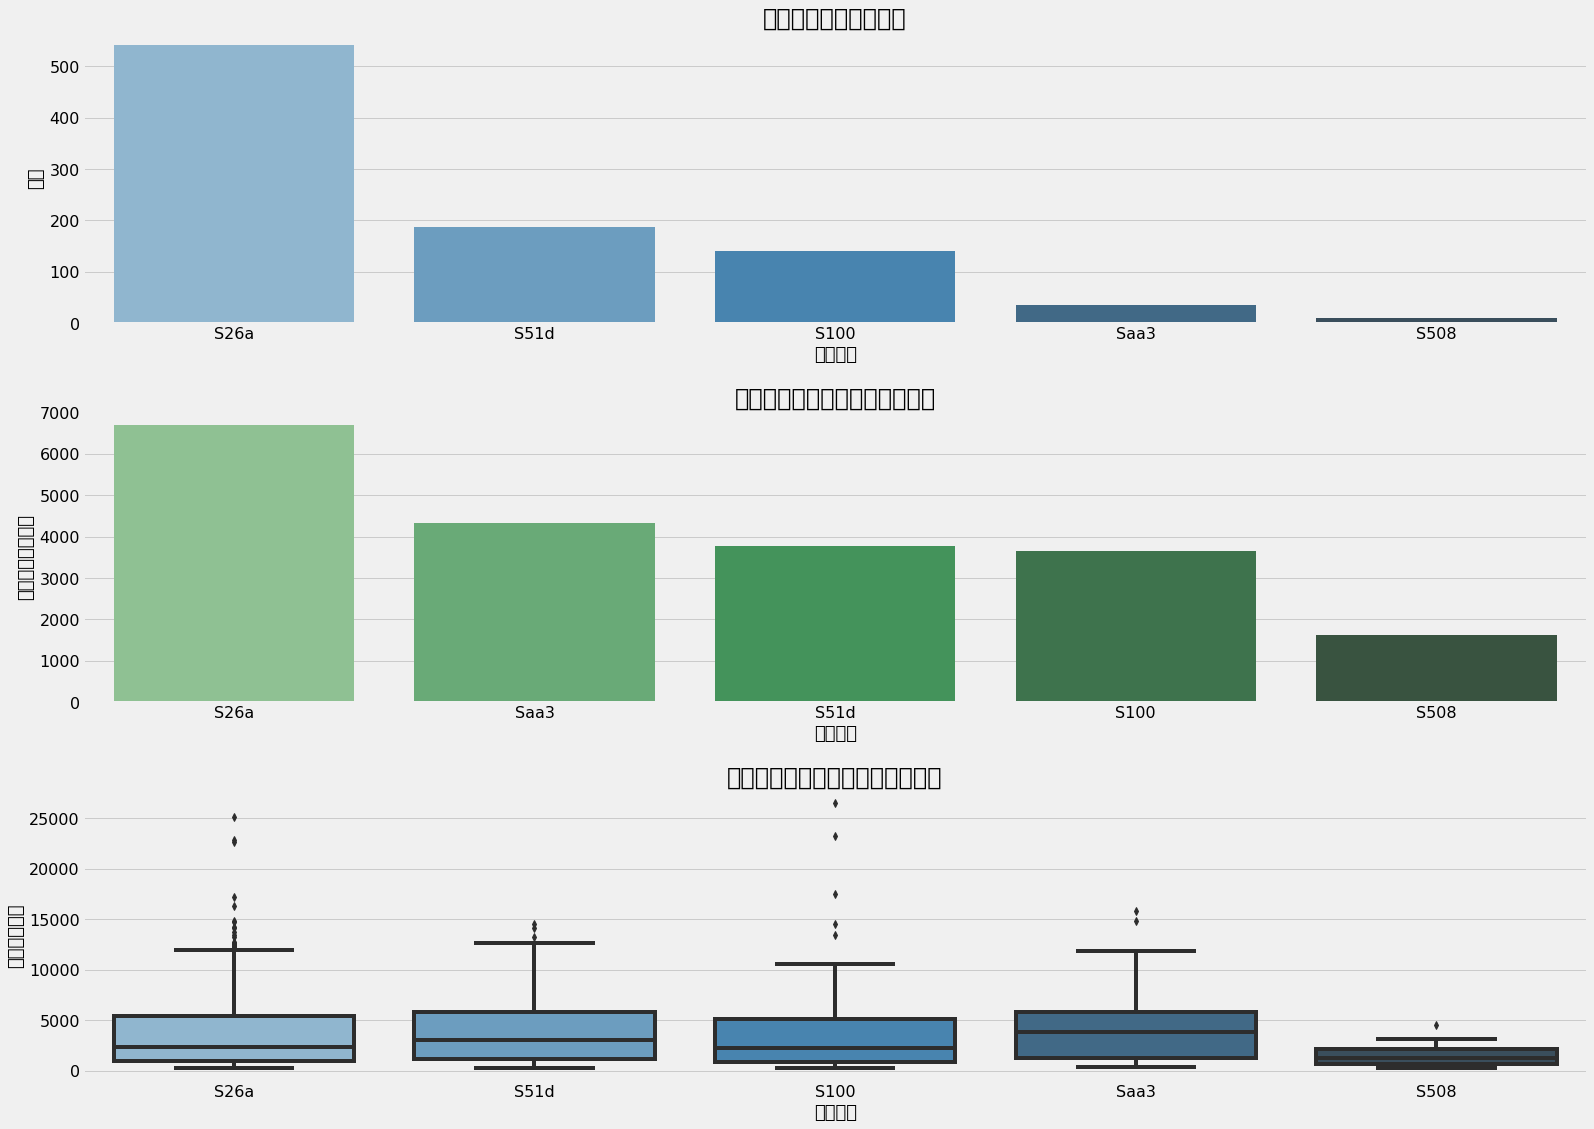

In [ ]:
f, [ax1, ax2, ax3] = plt.subplots(3, 1, figsize=(24,18))
sns.barplot(x='设备类型', y='部件工作时长', palette='Blues_d', data=df_device_type_count, ax=ax1)
ax1.set_title('不同设备类型计数分布', fontsize=24)
ax1.tick_params(axis='x',labelsize=16) 
ax1.tick_params(axis='y',labelsize=16) 
ax1.set_xlabel('设备类型', fontsize=18)
ax1.set_ylabel('数量', fontsize=18)

sns.barplot(x='设备类型', y='部件工作时长', palette='Greens_d', data=df_device_type_mean, ax=ax2)
ax2.set_title('不同设备类型部件工作平均时长', fontsize=24)
ax2.tick_params(axis='x',labelsize=16) 
ax2.tick_params(axis='y',labelsize=16) 
ax2.set_xlabel('设备类型', fontsize=18)
ax2.set_ylabel('部件工作平均时长', fontsize=18)

sns.boxplot(x='设备类型', y='部件工作时长', palette='Blues_d', data=parts_train_feature_df, ax=ax3)
ax3.set_title('不同设备类型部件工作时长箱形图', fontsize=24)
ax3.tick_params(axis='x',labelsize=16) 
ax3.tick_params(axis='y',labelsize=16) 
ax3.set_xlabel('设备类型', fontsize=18)
ax3.set_ylabel('部件工作时长', fontsize=18)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
plt.show()

**部件工作时长的离散值较高，非理想的正太分布**

# 数据建模

## 特征工程

### 对设备类型OneHot编码

In [ ]:
pd.isnull(parts_train_feature_df).sum()
parts_train_feature_df['life']=parts_train_feature_df['life'].fillna(parts_train_feature_df['life'].mean())

In [ ]:
parts_train_df = pd.get_dummies(parts_train_feature_df)

In [ ]:
parts_train_df.head()

,部件工作时长,累积量参数1,累积量参数2,转速信号1低转速段均值,转速信号1高转速段均值,转速信号1低转速段标准差,转速信号1高转速段标准差,转速信号2低转速段均值,转速信号2高转速段均值,转速信号2低转速段标准差,...,电流信号中电流段标准差,电流信号高电流段标准差,开关1信号,告警信号1,life,设备类型_S100,设备类型_S26a,设备类型_S508,设备类型_S51d,设备类型_Saa3
0,3326.00,59185.5,56400.5,0.000575,5.865716e+07,0.000738,2.139234e+07,122.310649,3.000604e+08,191.449691,...,1764.775400,60055.243966,6797.0,362.0,3316.50,0,1,0,0,0
1,6166.25,97185.0,99677.5,0.042393,5.544790e+07,0.025766,1.854247e+07,8.488713,2.809272e+08,4.894897,...,30.405761,190956.852635,11947.0,1156.0,6146.75,0,0,0,1,0
2,8502.50,164521.5,143383.5,0.080166,5.312286e+07,0.051841,1.860640e+07,2173.251711,2.680566e+08,2674.266921,...,1610.146868,51082.910575,15888.0,2610.0,8502.50,0,0,0,1,0
3,4748.75,98059.5,92761.5,0.059543,5.747958e+07,0.055675,2.153462e+07,796.848940,2.895916e+08,1121.068743,...,1418.995052,68630.353160,10048.0,1126.0,4748.75,0,1,0,0,0
4,2565.00,36822.5,40345.5,0.019760,5.918550e+07,0.012809,2.181445e+07,1173.750153,3.029923e+08,920.623654,...,33.565831,70302.082327,5112.0,82.0,2547.75,0,1,0,0,0


### 特征相关性

In [ ]:
#colormap = plt.cm.RdBu
#plt.figure(figsize=(20,20))
#sns.heatmap(parts_train_df.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
parts_train_df.corr()

,部件工作时长,累积量参数1,累积量参数2,转速信号1低转速段均值,转速信号1高转速段均值,转速信号1低转速段标准差,转速信号1高转速段标准差,转速信号2低转速段均值,转速信号2高转速段均值,转速信号2低转速段标准差,...,电流信号中电流段标准差,电流信号高电流段标准差,开关1信号,告警信号1,life,设备类型_S100,设备类型_S26a,设备类型_S508,设备类型_S51d,设备类型_Saa3
部件工作时长,1.000000,0.967544,0.971016,-0.096904,0.004786,-0.067003,-0.020071,-0.112272,-0.119123,-0.089413,...,-0.038070,0.004989,0.364401,0.257404,0.995772,-0.006237,-0.004310,-0.060403,0.009374,0.035265
累积量参数1,0.967544,1.000000,0.980945,-0.086768,-0.025965,-0.061067,-0.016256,-0.078769,-0.125753,-0.043456,...,-0.044275,0.010713,0.333872,0.227663,0.964349,-0.011758,-0.043876,-0.060745,0.063689,0.032818
累积量参数2,0.971016,0.980945,1.000000,-0.095464,-0.007596,-0.068043,-0.005178,-0.094764,-0.122035,-0.067415,...,-0.038699,0.004301,0.344631,0.241358,0.967964,0.001133,-0.029498,-0.057976,0.035553,0.029591
转速信号1低转速段均值,-0.096904,-0.086768,-0.095464,1.000000,-0.106063,0.884610,-0.058396,-0.029989,-0.013354,0.052369,...,-0.082131,-0.073230,-0.071993,-0.031525,-0.097824,0.065997,-0.084899,0.056557,0.057418,-0.057155
转速信号1高转速段均值,0.004786,-0.025965,-0.007596,-0.106063,1.000000,-0.088633,0.561782,-0.125220,0.572805,-0.164360,...,0.060514,-0.092064,0.396844,0.276423,0.006524,-0.101709,0.195191,-0.018973,-0.174527,0.067742
转速信号1低转速段标准差,-0.067003,-0.061067,-0.068043,0.884610,-0.088633,1.000000,-0.044854,-0.041453,-0.013413,0.023134,...,-0.062602,-0.054691,-0.050330,-0.022487,-0.067245,0.079259,-0.084205,0.045706,0.038864,-0.039107
转速信号1高转速段标准差,-0.020071,-0.016256,-0.005178,-0.058396,0.561782,-0.044854,1.000000,-0.098293,0.317051,-0.132879,...,0.134400,-0.088593,-0.091653,0.078574,-0.017898,-0.011744,0.098864,-0.016530,-0.150877,0.094205
转速信号2低转速段均值,-0.112272,-0.078769,-0.094764,-0.029989,-0.125220,-0.041453,-0.098293,1.000000,0.018558,0.939746,...,0.004210,0.014037,-0.104743,-0.050054,-0.113752,-0.025776,-0.164324,-0.049707,0.284856,-0.102256
转速信号2高转速段均值,-0.119123,-0.125753,-0.122035,-0.013354,0.572805,-0.013413,0.317051,0.018558,1.000000,-0.007193,...,0.084225,-0.047267,0.167970,0.080112,-0.119226,-0.019951,0.068808,-0.041120,-0.090965,0.074029
转速信号2低转速段标准差,-0.089413,-0.043456,-0.067415,0.052369,-0.164360,0.023134,-0.132879,0.939746,-0.007193,1.000000,...,-0.023615,-0.007576,-0.114415,-0.056369,-0.092653,-0.047393,-0.213171,-0.054693,0.376882,-0.127325


In [ ]:
#PCA降维
from sklearn.decomposition import PCA   
pca=PCA(n_components=10)     
reduced_x=pca.fit_transform(parts_train_df)
reduced_x

array([[ 2.28743499e+07, -1.07218240e+07,  1.89708707e+06, ...,
        -9.98859123e+03,  6.25558507e+03,  9.64630347e+02],
       [-2.12743832e+05, -1.61696473e+06, -4.05941352e+06, ...,
        -2.14739077e+04, -1.28993304e+03, -4.12656622e+03],
       [-1.23632856e+07, -6.60534127e+06, -3.64180537e+06, ...,
         2.18138423e+03, -7.60871653e+03,  1.20587190e+04],
       ...,
       [-9.02776007e+07, -2.96140975e+05, -6.40817204e+06, ...,
         1.06238069e+04,  6.10932329e+03,  1.19641463e+03],
       [ 5.20362454e+07, -5.06591570e+06,  3.03588241e+06, ...,
        -2.06783209e+04,  8.68961420e+03,  3.24407852e+02],
       [ 3.55829346e+06, -6.06567061e+06, -1.53408020e+06, ...,
        -2.61300508e+04,  5.26919864e+03, -7.93340117e+02]])

## 测试集特征工程

In [ ]:
test_path = '/content/drive/MyDrive/big_data/test1/'
df_test_feature = pd.DataFrame(columns=columns)

In [ ]:
test_file_name = []
for file in os.listdir(test_path):
    test_file_name.append(file)
    connet_df = pd.read_csv(test_path + file)
    #数据升维
    #电流信号e
    length_e = len(connet_df['电流信号'])
    low_current_e = list(num for num in connet_df['电流信号'] if 0 <= num < 20)
    mid_current_e = list(num for num in connet_df['电流信号'] if 500 <= num < 750)
    high_current_e = list(num for num in connet_df['电流信号'] if 800 <= num < 1800)
    low_percentage_e = np.sum(low_current_e) / length_e
    mid_percentage_e = np.sum(mid_current_e) / length_e
    high_percentage_e = np.sum(high_current_e) / length_e
    #流量信号f
    length_f = len(connet_df['流量信号'])
    low_current_f = list(num for num in connet_df['流量信号'] if 0 <= num < 9)
    mid_current_f = list(num for num in connet_df['流量信号'] if 10 <= num < 120)
    high_current_f = list(num for num in connet_df['流量信号'] if 125 <= num < 145)
    low_percentage_f = np.sum(low_current_f) / length_f
    mid_percentage_f = np.sum(mid_current_f) / length_f
    high_percentage_f = np.sum(high_current_f) / length_f
    #压力信号1_p1
    length_p1=len(connet_df['压力信号1'])
    low_pressure_p1 = list(num for num in connet_df['压力信号1'] if 65 <= num <=75)
    high_pressure_p1 = list(num for num in connet_df['压力信号1'] if 180 <= num <= 400)
    low_percentage_p1 = np.sum(low_pressure_p1) / length_p1
    high_percentage_p1 = np.sum(high_pressure_p1) / length_p1
    #压力信号2_p2
    length_p2=len(connet_df['压力信号2'])
    low_pressure_p2 = list(num for num in connet_df['压力信号2'] if 0 <= num <=50)
    high_pressure_p2 = list(num for num in connet_df['压力信号2'] if 200 <= num)
    low_percentage_p2 = np.sum(low_pressure_p2) / length_p2
    high_percentage_p2 = np.sum(high_pressure_p2) / length_p2
    #转速信号1_r1
    length_r1 = len(connet_df['转速信号1'])
    low_pressure_r1 = list(num for num in connet_df['转速信号1'] if 0 <= num <=100)
    high_pressure_r1 = list(num for num in connet_df['转速信号1'] if 3000 <= num)
    low_percentage_r1 = np.sum(low_pressure_r1) / length_r1
    high_percentage_r1 = np.sum(high_pressure_r1) / length_r1
    #转速信号2_r2
    length_r2 = len(connet_df['转速信号2'])
    low_pressure_r2 = list(num for num in connet_df['转速信号2'] if 0 <= num <=1000)
    high_pressure_r2 = list(num for num in connet_df['转速信号2'] if 10000 <= num) 
    low_percentage_r2 = np.sum(low_pressure_r2) / length_r2
    high_percentage_r2 = np.sum(high_pressure_r2) / length_r2
    df_test_feature = df_test_feature.append(pd.DataFrame({'部件工作时长':[connet_df['部件工作时长'].max()],
                                                   '累积量参数1':[connet_df['累积量参数1'].max()],
                                                   '累积量参数2':[connet_df['累积量参数2'].max()],
                                                   '转速信号1低转速段均值':np.mean(low_pressure_r1) * low_percentage_r1,
                                                   '转速信号1高转速段均值':np.mean(high_pressure_r1) * high_percentage_r1,
                                                   '转速信号1低转速段标准差':np.std(low_pressure_r1) * low_percentage_r1,
                                                   '转速信号1高转速段标准差':np.std(high_pressure_r1) * high_percentage_r1,
                                                   '转速信号2低转速段均值':np.mean(low_pressure_r2) * low_percentage_r2,
                                                   '转速信号2高转速段均值':np.mean(high_pressure_r2) * high_percentage_r2,
                                                   '转速信号2低转速段标准差':np.std(low_pressure_r2) * low_percentage_r2,
                                                   '转速信号2高转速段标准差':np.std(high_pressure_r2) * high_percentage_r2,
                                                   '压力信号1低压力段标准差':[np.std(low_pressure_p1) * low_percentage_p1],
                                                   '压力信号1高压力段标准差':[np.std(low_pressure_p1) * low_percentage_p1],
                                                   '压力信号2低压力段标准差':[np.std(low_pressure_p2) * low_percentage_p2],
                                                   '压力信号2高压力段标准差':[np.std(low_pressure_p2) * low_percentage_p2],
                                                   '温度信号均值':[connet_df['温度信号'].mean()],
                                                   '温度信号标准差':[connet_df['温度信号'].std()],
                                                   '流量信号均值':[connet_df['流量信号'].mean()],
                                                   '流量信号标准差':[connet_df['流量信号'].std()],
                                                   '流量信号低流量段均值':np.mean(low_current_f) * low_percentage_f,
                                                   '流量信号中流量段均值':np.mean(low_current_f) * low_percentage_f,
                                                   '流量信号高流量段均值':np.mean(low_current_f) * low_percentage_f,
                                                   '流量信号低流量段标准差':np.mean(low_current_f) * low_percentage_f,
                                                   '流量信号中流量段标准差':np.mean(low_current_f) * low_percentage_f,
                                                   '流量信号高流量段标准差':np.mean(low_current_f) * low_percentage_f,
                                                   '电流信号低电流段均值':np.mean(low_current_e) * low_percentage_e,
                                                   '电流信号中电流段均值':np.mean(mid_current_e) * mid_percentage_e,
                                                   '电流信号高电流段均值':np.mean(high_current_e) * high_percentage_e,
                                                   '电流信号低电流段标准差':np.std(low_current_e) * low_percentage_e,
                                                   '电流信号中电流段标准差':np.std(mid_current_e) * mid_percentage_e,
                                                   '电流信号高电流段标准差':np.std(high_current_e) * high_percentage_e,
                                                   '开关1信号':[connet_df['开关1信号'][connet_df['开关1信号']>0].sum()],
                                                   '开关2信号':[connet_df['开关2信号'][connet_df['开关2信号']>0].sum()],
                                                   '告警信号1':[connet_df['告警信号1'][connet_df['告警信号1']>0].sum()],
                                                   '设备类型':[connet_df['设备类型'][0]]}),
                                     ignore_index=True)
test_file_name = np.array(test_file_name)
print(test_file_name.shape)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(890,)


In [ ]:
for item in ['累积量参数1', '累积量参数2', 
           '转速信号1低转速段均值', '转速信号1高转速段均值','转速信号1低转速段标准差', '转速信号1高转速段标准差',
           '转速信号2低转速段均值', '转速信号2高转速段均值','转速信号2低转速段标准差', '转速信号2高转速段标准差', 
           '压力信号1低压力段标准差', '压力信号1高压力段标准差', '压力信号2低压力段标准差', '压力信号2高压力段标准差', 
           '温度信号均值', '温度信号标准差', '流量信号均值', '流量信号标准差', 
           '流量信号低流量段均值','流量信号中流量段均值','流量信号高流量段均值','流量信号低流量段标准差','流量信号中流量段标准差','流量信号高流量段标准差',
           '电流信号低电流段均值','电流信号中电流段均值','电流信号高电流段均值','电流信号低电流段标准差','电流信号中电流段标准差','电流信号高电流段标准差']:
  df_test_feature[item]=df_test_feature[item].fillna(df_test_feature[item].mean())

In [ ]:
pd.isnull(df_test_feature).sum()

部件工作时长          0
累积量参数1          0
累积量参数2          0
转速信号1低转速段均值     0
转速信号1高转速段均值     0
转速信号1低转速段标准差    0
转速信号1高转速段标准差    0
转速信号2低转速段均值     0
转速信号2高转速段均值     0
转速信号2低转速段标准差    0
转速信号2高转速段标准差    0
压力信号1低压力段标准差    0
压力信号1高压力段标准差    0
压力信号2低压力段标准差    0
压力信号2高压力段标准差    0
温度信号均值          0
温度信号标准差         0
流量信号均值          0
流量信号标准差         0
流量信号低流量段均值      0
流量信号中流量段均值      0
流量信号高流量段均值      0
流量信号低流量段标准差     0
流量信号中流量段标准差     0
流量信号高流量段标准差     0
电流信号低电流段均值      0
电流信号中电流段均值      0
电流信号高电流段均值      0
电流信号低电流段标准差     0
电流信号中电流段标准差     0
电流信号高电流段标准差     0
开关1信号           0
开关2信号           0
告警信号1           0
设备类型            0
dtype: int64

In [ ]:
df_test_feature = df_test_feature.drop('开关2信号', axis=1)


In [ ]:
from pandas.api.types import CategoricalDtype

df_test_feature['设备类型'] = df_test_feature['设备类型'].astype(CategoricalDtype(categories=['S100','S26a','S508','S51d','Saa3']))

In [ ]:
df_test_feature_dummies = pd.get_dummies(df_test_feature)

In [ ]:
df_test_feature_dummies.describe()

,部件工作时长,累积量参数1,累积量参数2,转速信号1低转速段均值,转速信号1高转速段均值,转速信号1低转速段标准差,转速信号1高转速段标准差,转速信号2低转速段均值,转速信号2高转速段均值,转速信号2低转速段标准差,...,电流信号低电流段标准差,电流信号中电流段标准差,电流信号高电流段标准差,开关1信号,告警信号1,设备类型_S100,设备类型_S26a,设备类型_S508,设备类型_S51d,设备类型_Saa3
count,890.000000,890.000000,890.000000,890.000000,8.900000e+02,890.000000,8.900000e+02,890.000000,8.900000e+02,890.000000,...,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,2296.797191,41528.034270,39929.821348,0.131067,5.867121e+07,0.111234,1.991457e+07,2589.482655,2.825724e+08,2403.289565,...,0.001437,1205.659314,131685.513962,5666.108989,529.207865,0.153933,0.561798,0.017978,0.203371,0.062921
std,2546.323363,44534.229051,43280.873037,0.243630,7.980353e+06,0.299456,2.504319e+06,3362.799155,5.901972e+07,2653.527549,...,0.002697,1772.298162,86387.444451,9722.202632,3138.443056,0.361087,0.496445,0.132944,0.402732,0.242958
min,45.000000,957.000000,0.000000,0.000004,4.201555e+07,0.000000,1.154320e+07,0.001712,3.808144e+04,0.000000,...,0.000017,0.000000,17.513449,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,567.750000,10652.125000,10057.125000,0.023169,5.408750e+07,0.013094,1.824702e+07,247.937832,2.672062e+08,394.880957,...,0.000517,31.796002,61409.899997,1226.500000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1321.750000,26554.000000,23858.250000,0.061857,5.768509e+07,0.036723,1.969232e+07,1213.403824,2.825724e+08,1272.603256,...,0.000886,1179.415369,92626.460920,2972.500000,134.500000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,3041.000000,56368.125000,54093.000000,0.131067,6.160529e+07,0.111234,2.145510e+07,3840.632654,3.055533e+08,3743.915934,...,0.001620,1470.326489,207347.287447,6627.000000,419.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,22365.750000,376937.000000,366145.000000,3.926926,1.172051e+08,5.122510,3.266759e+07,23697.626122,5.222308e+08,15685.376274,...,0.043001,14147.417035,383897.133922,143906.000000,87885.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#数据降维
from sklearn.decomposition import PCA   
pca=PCA(n_components=10)     
reduced_x=pca.fit_transform(df_test_feature_dummies)
reduced_x

array([[ 2.56823408e+08,  8.23950734e+06,  5.42860486e+06, ...,
        -5.78347668e+03, -3.10424110e+03, -3.35657828e+03],
       [-1.65596664e+07,  5.39816872e+04, -1.97703501e+06, ...,
        -8.76896547e+03,  1.63352692e+03, -2.77556548e+03],
       [ 2.59375505e+07, -1.84728251e+06, -4.66527900e+06, ...,
         1.73305079e+04, -1.69464589e+02,  4.72540888e+03],
       ...,
       [ 1.21499346e+07, -2.05207550e+06, -3.24039287e+06, ...,
        -1.02398050e+03, -5.82050271e+02, -5.33917734e+03],
       [ 1.00944468e+07, -3.10428751e+06, -3.53794596e+06, ...,
        -1.55551833e+03,  1.06547950e+03, -2.64670913e+03],
       [ 3.10860486e+07, -5.00148175e+06, -3.41495219e+06, ...,
         9.58884286e+03, -4.46122628e+01,  8.04145421e+02]])

## 数据建模预测

In [ ]:
df_train_feature_modeling = parts_train_df.drop(columns=['life'])

df_train_feature_modeling.to_csv('./test_result/train_feature/df_train_feature_modeling.csv', encoding='gb2312')

In [ ]:
X = df_train_feature_modeling.values
y = df_train_label['life'].values

In [ ]:
X

array([[3.326000e+03, 5.918550e+04, 5.640050e+04, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [6.166250e+03, 9.718500e+04, 9.967750e+04, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [8.502500e+03, 1.645215e+05, 1.433835e+05, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       ...,
       [2.805000e+02, 1.092850e+04, 6.493500e+03, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [7.775000e+02, 1.161050e+04, 1.231100e+04, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.341000e+03, 2.870450e+04, 2.968550e+04, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]])

### 数据划分

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1024)

### 建立模型

DecisionTreeRegressor:1.30392  
SVR:1.31038  

In [ ]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [ ]:
# 利用GridSearchCV计算最优解
def fit_model(X, y):
    """ 基于输入数据 [X,y]，利于网格搜索找到最优的决策树模型"""

    cross_validator = KFold(10, shuffle=True)
    regressor = DecisionTreeRegressor()

    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}
    scoring_fnc = make_scorer(performance_metric)
    grid = GridSearchCV(estimator = regressor, param_grid = params, scoring = scoring_fnc, cv = cross_validator)

    # 基于输入数据 [X,y]，进行网格搜索
    grid = grid.fit(X, y)

    return grid.best_estimator_

# 计算R2分数
def performance_metric(y_true, y_predict):
    """计算并返回预测值相比于真实值的R2分数"""
    score = r2_score(y_true, y_predict)

    return score

### 调参优化模型

In [ ]:
optimal_reg1 = fit_model(X_train, y_train)

# 输出最优模型的参数
print("最理想模型的参数：'max_depth' : {0}".format(optimal_reg1.get_params()['max_depth']))

predicted_value = optimal_reg1.predict(X_test)
r2 = performance_metric(y_test, predicted_value)

print("最优模型在测试数据上 R^2 分数 {:,.2f}。".format(r2))

最理想模型的参数：'max_depth' : 9
最优模型在测试数据上 R^2 分数 0.99。


### 模型预测

In [ ]:
predicted_test_value = optimal_reg1.predict(df_test_feature_dummies)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
df_test_label = pd.DataFrame({'test_file_name':test_file_name, 'life':predicted_test_value})

In [ ]:
df_test_label.describe()

,life
count,890.000000
mean,2274.693106
std,2522.225603
min,228.000000
25%,550.833333
50%,1304.395833
75%,3029.250000
max,22646.250000


### 输出文件

In [ ]:
#cmp_test_df = pd.read_csv('/content/drive/MyDrive/big_data/test_result/df_test_label_lgb_0808_3.csv')

In [ ]:
#cmp_test_df.describe()

In [ ]:
df_test_label.to_csv('/content/drive/MyDrive/big_data/test_result/df_test_label_0724_3.csv', index=0)
cmp_test_df = pd.read_csv('/content/drive/MyDrive/big_data/test_result/df_test_label_0724_3.csv')
cmp_test_df.describe()

,life
count,890.000000
mean,2274.693106
std,2522.225603
min,228.000000
25%,550.833333
50%,1304.395833
75%,3029.250000
max,22646.250000
